## Import the packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Load the data

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\Users\\Sai Pavan Vulasi\\Documents\\GitHub\\Traffic-Sign-Recognition'

In [3]:
data_dir = os.path.join(curr_dir,'Data')

In [4]:
test_csv = pd.read_csv(data_dir+'/'+'Test.csv')

In [5]:
train_dir = os.path.join(data_dir,'Train')

In [6]:
test_dir = os.path.join(data_dir,'Test')

In [7]:
#collect all the training images
classIds = 43
datalist = []
labels = []
for i in range(43):
    folder = os.path.join(train_dir,str(i))
    for image in os.listdir(folder):
        image = load_img(folder+"/"+image)
        image = image.resize((50,50)) # resizing all the images to same size
        img = np.array(image)  #convert all images to arrays
        datalist.append(img)
        labels.append(i)
data = np.array(datalist)
labels = np.array(labels)
        

## Training,Cross-validation and model tuning

In [8]:
x_train,x_val,y_train,y_val = train_test_split(data,labels,test_size=0.2)

In [9]:
x_train.shape

(31367, 50, 50, 3)

In [10]:
y_train.shape

(31367,)

In [11]:
x_val.shape

(7842, 50, 50, 3)

In [12]:
y_val.shape

(7842,)

Since we are dealing with classification problem we have to perform one hot encoding on our labels. It is optional though instead of that we can just leave it and use appropriate loss function during compilation.

In [13]:
y_train = tf.one_hot(y_train,43)
y_val = tf.one_hot(y_val,43)

### Build the model

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (50,50,3),padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(512,activation='relu'))

model.add(tf.keras.layers.Dense(43,activation='softmax'))

In [15]:
batch_size = 64
epochs = 20

### Compile the model

In [16]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

In [18]:
history = model.fit(x_train,y_train,
                   epochs=epochs,batch_size=batch_size,validation_data=(x_val,y_val))

Epoch 1/20
491/491 [==============================] - 6s 12ms/step - loss: 2.5501 - accuracy: 0.2721 - val_loss: 1.6184 - val_accuracy: 0.4540
Epoch 2/20
491/491 [==============================] - 5s 11ms/step - loss: 1.4968 - accuracy: 0.4970 - val_loss: 1.0491 - val_accuracy: 0.6521
Epoch 3/20
491/491 [==============================] - 5s 11ms/step - loss: 0.9546 - accuracy: 0.6807 - val_loss: 0.5866 - val_accuracy: 0.7851
Epoch 4/20
491/491 [==============================] - 5s 11ms/step - loss: 0.6560 - accuracy: 0.7805 - val_loss: 0.3475 - val_accuracy: 0.8720
Epoch 5/20
491/491 [==============================] - 5s 11ms/step - loss: 0.4960 - accuracy: 0.8344 - val_loss: 0.2258 - val_accuracy: 0.9202
Epoch 6/20
491/491 [==============================] - 5s 11ms/step - loss: 0.3838 - accuracy: 0.8751 - val_loss: 0.1780 - val_accuracy: 0.9417
Epoch 7/20
491/491 [==============================] - 5s 11ms/step - loss: 0.3426 - accuracy: 0.8918 - val_loss: 0.1205 - val_accuracy: 0.9614

In [19]:
loss= history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

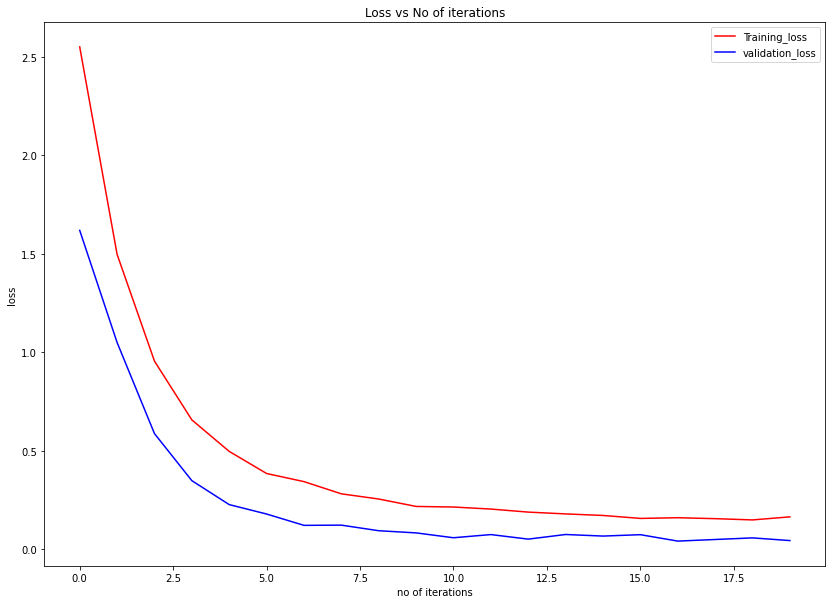

In [20]:
plt.figure(figsize=(14,10))
iterations = range(epochs)
plt.plot(iterations,loss,label='Training_loss',color='red')
plt.plot(iterations,val_loss,label='validation_loss',color='blue')
plt.xlabel('no of iterations')
plt.ylabel('loss')
plt.title('Loss vs No of iterations')
plt.legend()
plt.show()

- Observations:
    - Train accuracy and validation accuracy remains almost same after 10 epochs. so it's probably better to keep epochs to 10.
    - Model seems to perform very well on both training and validation sets

## Predictions

Before we make predictions we have to collect our test images from test folder in our base directory. Then we will test our model on this set to see how well it generalizes.

In [21]:
test_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [22]:
test_labels = test_csv['ClassId'].values

In [23]:
image_paths = test_csv['Path'].values
test_images = []

for img_path in image_paths:
    image = load_img(data_dir+'/'+img_path)
    image = image.resize((50,50))
    img = np.array(image)
    test_images.append(img)

test_images = np.array(test_images)

In [24]:
predictions = model.predict(test_images)

395/395 [==============================] - 1s 3ms/step


In [25]:
len(predictions)

12630

In [26]:
pred_labels = []

for i,arr in enumerate(predictions):
    y_pred = np.argmax(arr)
    pred_labels.append(y_pred)


In [27]:
pred_labels = np.array(pred_labels)

In [28]:
print('Accuracy: ',accuracy_score(test_labels,pred_labels))

Accuracy:  0.9587490102929533
